# Coursera & IBM Machine Learning - DEEP LEARNING Final Project
## Review Criteria
Your peer or instructor will review your report from the perspective of a Chief Data Officer or the Head of Analytics of your team and will assess whether the Deep Learning model you selected best helped you achieve the main objective of your analysis.

Yes, you are expected to leverage a wide variety of tools, but this report should focus on presenting findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not a code review. Optionally, you can submit your code as a python notebook or as a print out in the appendix of your document.

The grading will center around 5 main points:

* Does the report include a section describing the data?
* Does the report include a paragraph detailing the main objective(s) of this analysis?  
* Does the report include a section with variations of a Deep Learning model and specifies which one is the model that best suits the main objective(s) of this analysis?
* Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?
* Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different modeling techniques? 

## Requirements

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

Sections required in your report:

* Main objective of the analysis that also specifies whether your model will be focused on a specific type of Deep Learning or Reinforcement Learning algorithm and the benefits that your analysis brings to the business or stakeholders of this data.
* Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.
* Brief summary of data exploration and actions taken for data cleaning or feature engineering.
* Summary of training at least three variations of the Deep Learning model you selected. For example, you can use different clustering techniques or different hyperparameters.
* A paragraph explaining which of your Deep Learning models you recommend as a final model that best fits your needs in terms of accuracy or explainability.
* Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.
* Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

## 1. Import Dataset

|Name | Description | Type |
|:----|-------------|------|
|ID | index number assigned to each customer | (useless for ML)|
|LIMIT_BAL | amount of the given credit in New Taiwan Dollar | continuous |
| SEX gender | (1= male; 2= female) | categorical |
|EDUCATION | level of education (1= graduate school; 2= university; 3= high school; 4= others) | categorical |
|MARRIAGE | marital status (1= married; 2= single; 3= others) | categorical |
| AGE | age in years | continuous |
| PAY_n | history of past payment; 𝑛 tracks the 6 months of payment record (from April to September, 2005); ||
| |the repayment status is: -1= pay duly, 1= payment delay for one month, 2= payment delay for two months, etc. | ordinal |
| BILL_AMT_n | amount of the bill in NTD (𝑛 tracks the 6 months) | continuous |
| PAY_AMT_n | amount paid in NTD (𝑛 tracks the 6 months) | continuous |

In [1]:
# setup
import pandas as pd
import numpy as np

In [2]:
# link https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
# read data in pandas dataframe
df = pd.read_excel('default_of_credit_card_clients.xls', header=1)

# remove ID and rename DEFAULT column
df.rename({'default payment next month':'DEFAULT'}, axis='columns', inplace=True)
df.drop('ID',axis=1,inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
round(df.describe(),2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,-0.27,...,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,1.13,...,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,...,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,...,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


## 2 Data Quality Check & Encoding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [5]:
# checking for duplicates & deleting them
print(df.duplicated(keep='first').sum())
df.drop_duplicates(keep='first',inplace=True)
df.shape

35


(29965, 24)

In [6]:
# check categorical variables for missing values
cat_col = ['SEX', 'EDUCATION', 'MARRIAGE']
for col in cat_col:
    print(col, ':', df[col].unique())

SEX : [2 1]
EDUCATION : [2 1 3 5 4 6 0]
MARRIAGE : [1 2 3 0]


In [7]:
# assume missing values have been entred as 0
# how many missing values
len(df.loc[(df['EDUCATION']==0) | (df['MARRIAGE']==0)])

68

In [8]:
# drop rows where EDUCATION or MARRIAGE = 0
df= df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]
df.shape

(29897, 24)

In [9]:
# encode the cateogricals as dummies
cat_col = ['EDUCATION', 'MARRIAGE']
df = pd.get_dummies(df, columns=cat_col)
df["SEX"].replace({1:0 , 2:1}, inplace=True) # 0 =  male, 1 = female
df.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

## 3. Resampling the Target Variable

In [10]:
# visualization setup
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 12})

In [11]:
# downsapling
from sklearn.utils import resample
df_paid_off= df[df['DEFAULT']==0]
df_defaulted= df[df['DEFAULT']==1]

df_paid_off_downsampled= resample(df_paid_off,
                                   replace=False,
                                   n_samples=len(df_defaulted),
                                   random_state=420)
len(df_paid_off_downsampled)

6625

In [12]:
df_downsampled= pd.concat([df_paid_off_downsampled, df_defaulted])
df_downsampled.reset_index(inplace=True)
df_downsampled.drop('index',axis=1,inplace=True)
print(len(df_downsampled))
print(df_downsampled['DEFAULT'].mean())

13250
0.5


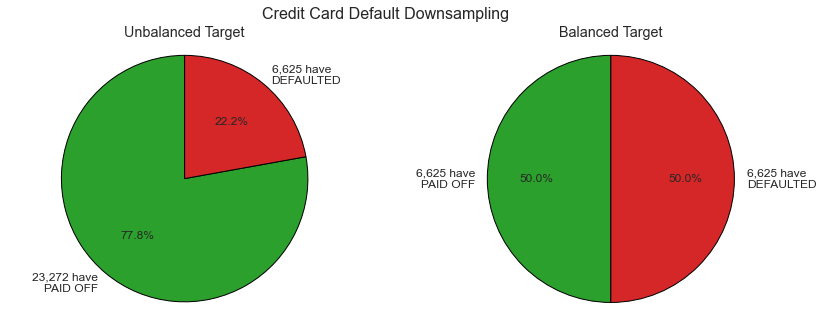

In [13]:
tar_bal1 = np.array(df['DEFAULT'].value_counts())
tar_bal2 = np.array(df_downsampled['DEFAULT'].value_counts())

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
fig.suptitle("Credit Card Default Downsampling", fontsize=16)

axs[0].pie(tar_bal1,
        labels=['{:,} have\nPAID OFF'.format(tar_bal1[0]),'{:,} have\nDEFAULTED'.format(tar_bal1[1])],
        colors=['tab:green','tab:red'],
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={"edgecolor":"k"})
axs[0].axis("equal")
axs[0].set_title("Unbalanced Target")

axs[1].pie(tar_bal2,
        labels=['{:,} have\nPAID OFF'.format(tar_bal2[0]),'{:,} have\nDEFAULTED'.format(tar_bal2[1])],
        colors=['tab:green','tab:red'],
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={"edgecolor":"k"})
axs[1].axis("equal")
axs[1].set_title("Balanced Target");

In [14]:
round(df_downsampled.describe(), 2)

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,DEFAULT,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
count,13250.00,13250.00,13250.00,13250.00,13250.00,13250.00,13250.00,13250.00,13250.00,13250.00,...,13250.0,13250.00,13250.00,13250.00,13250.00,13250.00,13250.00,13250.00,13250.00,13250.00
mean,154177.18,0.59,35.51,0.22,0.08,0.02,-0.05,-0.11,-0.15,49755.88,...,0.5,0.34,0.48,0.17,0.00,0.01,0.00,0.46,0.52,0.01
std,126363.49,0.49,9.34,1.27,1.34,1.33,1.32,1.28,1.29,73091.24,...,0.5,0.47,0.50,0.38,0.05,0.08,0.04,0.50,0.50,0.11
min,10000.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00,-165580.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,0.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3561.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,120000.00,1.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,21107.00,...,0.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,220000.00,1.00,42.00,1.00,0.00,0.00,0.00,0.00,0.00,63892.25,...,1.0,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
max,800000.00,1.00,75.00,8.00,7.00,8.00,8.00,8.00,8.00,653062.00,...,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## 4. Exploratory Data Analysis

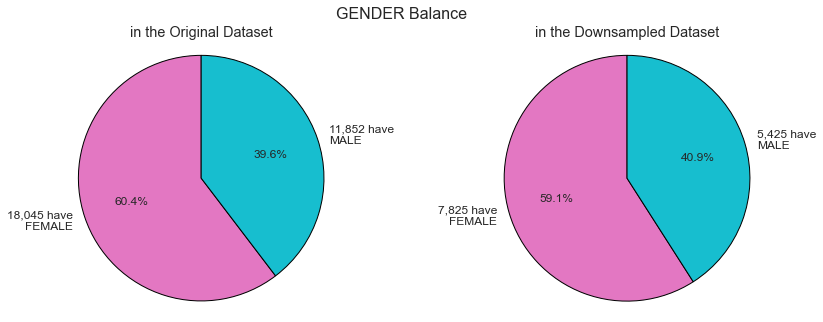

In [15]:
# dataset balance of gender
gen_bal1 = np.array(df['SEX'].value_counts())
gen_bal2 = np.array(df_downsampled['SEX'].value_counts())

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
fig.suptitle("GENDER Balance", fontsize=16)

axs[0].pie(gen_bal1,
        labels=['{:,} have\nFEMALE'.format(gen_bal1[0]),'{:,} have\nMALE'.format(gen_bal1[1])],
        colors=['#e377c2','#17becf'],
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={"edgecolor":"k"})
axs[0].axis("equal")
axs[0].set_title("in the Original Dataset")

axs[1].pie(gen_bal2,
        labels=['{:,} have\nFEMALE'.format(gen_bal2[0]),'{:,} have\nMALE'.format(gen_bal2[1])],
        colors=['#e377c2','#17becf'],
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={"edgecolor":"k"})
axs[1].axis("equal")
axs[1].set_title("in the Downsampled Dataset");

In [16]:
# create X & y for original & downsampled dataset
X_origin = df.drop('DEFAULT',axis=1).copy()
X_sampled = df_downsampled.drop('DEFAULT',axis=1).copy()
y_origin = df['DEFAULT'].copy()
y_sampled = df_downsampled['DEFAULT'].copy()
print(X_origin.shape, y_origin.shape)
print(X_sampled.shape, y_sampled.shape)

corr_origin = X_origin.corrwith(y_origin)
corr_origin.sort_values(inplace=True)
corr_sampled = X_sampled.corrwith(y_sampled)
corr_sampled.sort_values(inplace=True)

(29897, 30) (29897,)
(13250, 30) (13250,)


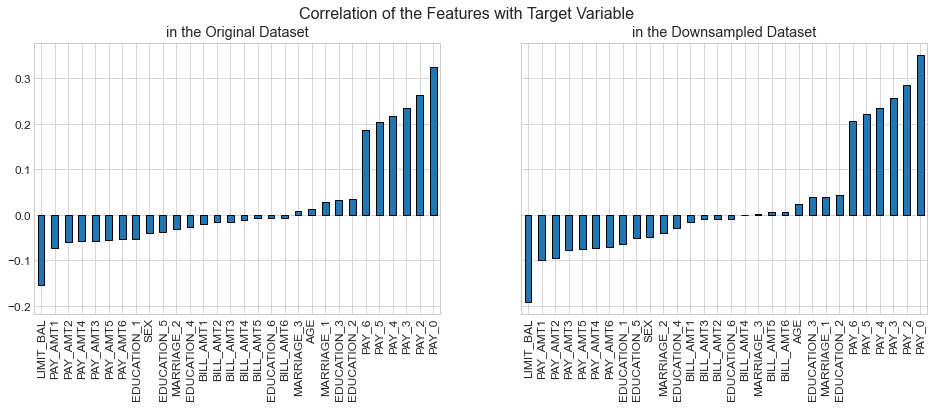

In [17]:
# compare correlations visually
fig, axs = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(16,5))
fig.suptitle("Correlation of the Features with Target Variable", fontsize=16)
corr_origin.plot(kind='bar',ax=axs[0],edgecolor='k')
axs[0].set_title('in the Original Dataset')

corr_sampled.plot(kind='bar',ax=axs[1],edgecolor='k')
axs[1].set_title('in the Downsampled Dataset');

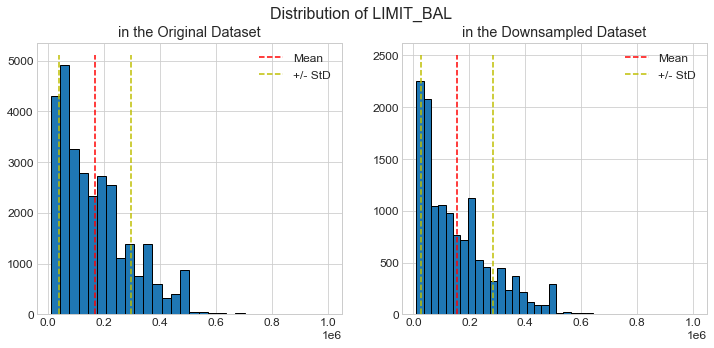

In [18]:
fig, axs = plt.subplots(ncols=2, nrows=1,sharex=True,figsize=(12,5))
fig.suptitle('Distribution of LIMIT_BAL', fontsize=16)

axs[0].hist(df['LIMIT_BAL'], bins=30, edgecolor='k')
axs[0].vlines(df['LIMIT_BAL'].mean(), 0, 5100, ls='--', color='r', label='Mean')
axs[0].vlines([df['LIMIT_BAL'].mean()-df['LIMIT_BAL'].std(),df['LIMIT_BAL'].mean()+df['LIMIT_BAL'].std()], 0, 5100, ls='--', color='y', label='+/- StD')
axs[0].legend()
axs[0].set_title('in the Original Dataset')
              
axs[1].hist(df_downsampled['LIMIT_BAL'], bins=30, edgecolor='k')
axs[1].vlines(df_downsampled['LIMIT_BAL'].mean(), 0, 2500, ls='--', color='r', label='Mean')
axs[1].vlines([df_downsampled['LIMIT_BAL'].mean()-df_downsampled['LIMIT_BAL'].std(),df_downsampled['LIMIT_BAL'].mean()+df['LIMIT_BAL'].std()], 0, 2500, ls='--', color='y', label='+/- StD')
axs[1].legend()
axs[1].set_title('in the Downsampled Dataset');

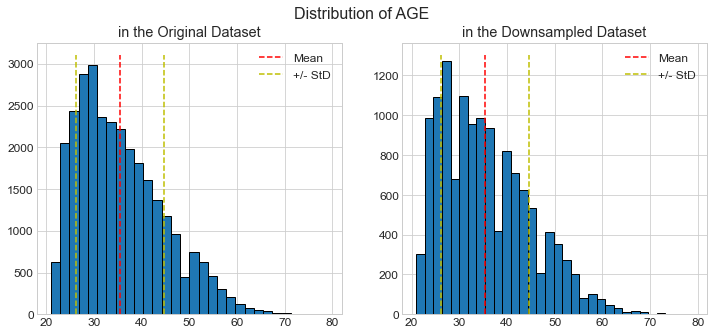

In [19]:
# compare distribution of AGE in original and sampled dataset
fig, axs = plt.subplots(ncols=2, nrows=1,sharex=True,figsize=(12,5))
fig.suptitle('Distribution of AGE', fontsize=16)
axs[0].hist(df['AGE'], bins=30, edgecolor='k')
axs[0].vlines(df['AGE'].mean(), 0, 3100, ls='--', color='r', label='Mean')
axs[0].vlines([df['AGE'].mean()-df['AGE'].std(),df['AGE'].mean()+df['AGE'].std()], 0, 3100, ls='--', color='y', label='+/- StD')
axs[0].legend()
axs[0].set_title('in the Original Dataset')

axs[1].hist(df_downsampled['AGE'], bins=30, edgecolor='k')
axs[1].vlines(df['AGE'].mean(), 0, 1300, ls='--', color='r', label='Mean')
axs[1].vlines([df['AGE'].mean()-df['AGE'].std(),df['AGE'].mean()+df['AGE'].std()], 0, 1300, ls='--', color='y', label='+/- StD')
axs[1].legend()
axs[1].set_title('in the Downsampled Dataset');

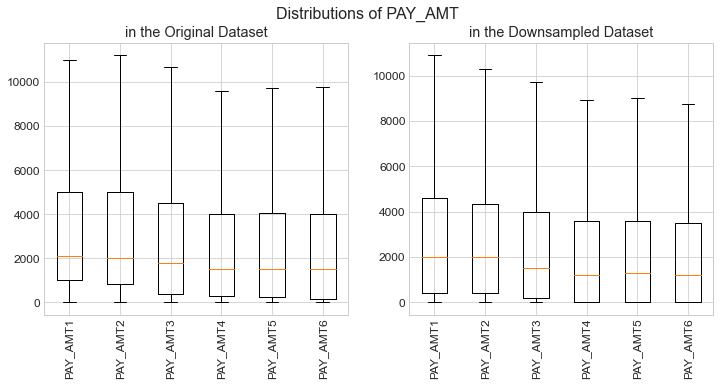

In [20]:
fig, axs = plt.subplots(ncols=2, nrows=1,figsize=(12,5))
fig.suptitle('Distributions of PAY_AMT', fontsize=16)

axs[0].boxplot(df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']],showfliers=False)
axs[0].set_xticklabels(labels=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], rotation=90)
axs[0].set_title('in the Original Dataset')

axs[1].boxplot(df_downsampled[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']],showfliers=False)
axs[1].set_xticklabels(labels=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], rotation=90)
axs[1].set_title('in the Downsampled Dataset');

## 4. Random Forest Classifier

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [22]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.25, random_state=11111)
print(round(np.mean(y_sampled), 4))
print(round(np.mean(y_train), 4))
print(round(np.mean(y_test), 4))

0.5
0.5012
0.4965


In [23]:
# random forest classifier
clf_rf = RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
n_est = [10, 50, 100, 200, 300]
n_feat = [2, 3, 4, 5, 6, 8, 10, 20, 30]

params = {'n_estimators': n_est,
         'max_features': n_feat}

grid = GridSearchCV(clf_rf, params, cv=5)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

best_RF_metrics = [accuracy_score(y_test,y_pred), precision_score(y_test,y_pred), recall_score(y_test,y_pred), f1_score(y_test,y_pred)]
print(grid.best_params_)
print(' ')
print(best_RF_metrics)

{'max_features': 2, 'n_estimators': 200}
 
[0.7081195291276788, 0.7331499312242091, 0.6480243161094225, 0.6879638593094547]


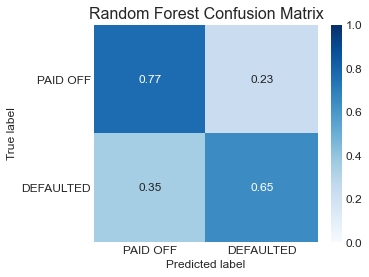

In [24]:
sns.set_style('white')
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'),index=['PAID OFF', 'DEFAULTED'], columns=['PAID OFF', 'DEFAULTED'])
plt.figure(figsize=(5,4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', vmin=0.0, vmax=1.0)
plt.xlabel('Predicted label')
plt.yticks(rotation=0)
plt.ylabel('True label')
plt.title('Random Forest Confusion Matrix', fontsize=16);

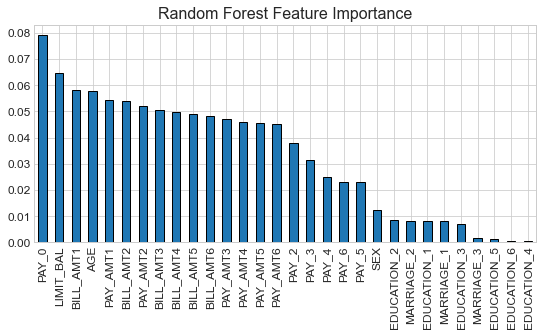

In [25]:
sns.set_style('whitegrid')
feat_imp = pd.DataFrame(grid.best_estimator_.feature_importances_, index=X_train.columns, columns=['size'])
feat_imp.sort_values(by=['size'],ascending=False,inplace=True)
feat_imp.plot(kind='bar',edgecolor='k',figsize=(9,4),legend=False);
plt.title('Random Forest Feature Importance', fontsize=16);

In [26]:
print("Random Forest Classification Report:")
print(' ')
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
 
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1668
           1       0.73      0.65      0.69      1645

    accuracy                           0.71      3313
   macro avg       0.71      0.71      0.71      3313
weighted avg       0.71      0.71      0.71      3313



## 5. Simple Neural Networks

In [27]:
# normalize data
normalizer = MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [28]:
X_train_norm.shape

(9937, 30)

In [29]:
## Import Keras objects for Deep Learning
import keras
from keras.models  import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD, RMSprop

from keras.wrappers.scikit_learn import KerasClassifier

In [30]:
# for reproducibility
from numpy.random import seed
seed(420)
import tensorflow as tf
tf.random.set_seed(420)

In [29]:
model_1 = Sequential()
model_1.add(Dense(15, input_shape = (X_train_norm.shape[1], ),activation = 'sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                465       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [30]:
callback = EarlyStopping(monitor='loss', patience=3)

model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200, batch_size=30, callbacks=[callback], verbose=0)

Epoch 1/200
332/332 - 2s - loss: 0.7020 - accuracy: 0.4816 - val_loss: 0.7001 - val_accuracy: 0.4902
Epoch 2/200
332/332 - 0s - loss: 0.7003 - accuracy: 0.4806 - val_loss: 0.6987 - val_accuracy: 0.4760
Epoch 3/200
332/332 - 0s - loss: 0.6994 - accuracy: 0.4734 - val_loss: 0.6978 - val_accuracy: 0.4648
Epoch 4/200
332/332 - 0s - loss: 0.6986 - accuracy: 0.4737 - val_loss: 0.6972 - val_accuracy: 0.4733
Epoch 5/200
332/332 - 0s - loss: 0.6979 - accuracy: 0.4788 - val_loss: 0.6964 - val_accuracy: 0.4706
Epoch 6/200
332/332 - 0s - loss: 0.6972 - accuracy: 0.4793 - val_loss: 0.6957 - val_accuracy: 0.4811
Epoch 7/200
332/332 - 0s - loss: 0.6965 - accuracy: 0.4856 - val_loss: 0.6950 - val_accuracy: 0.4911
Epoch 8/200
332/332 - 0s - loss: 0.6958 - accuracy: 0.4930 - val_loss: 0.6944 - val_accuracy: 0.4944
Epoch 9/200
332/332 - 0s - loss: 0.6952 - accuracy: 0.4960 - val_loss: 0.6937 - val_accuracy: 0.5119
Epoch 10/200
332/332 - 0s - loss: 0.6946 - accuracy: 0.5059 - val_loss: 0.6931 - val_accura

In [32]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
y_pred = model_1.predict_classes(X_test_norm)
best_1NN_metrics = [accuracy_score(y_test,y_pred), precision_score(y_test,y_pred), recall_score(y_test,y_pred), f1_score(y_test,y_pred)]
best_1NN_metrics

C:\Users\Tom-PC\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[0.6528825837609418,
 0.6523076923076923,
 0.6443768996960486,
 0.6483180428134556]

In [32]:
print("1st Neural Network Classification Report:")
print(classification_report(y_test, y_pred))

1st Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.66      0.66      1668
           1       0.65      0.64      0.65      1645

    accuracy                           0.65      3313
   macro avg       0.65      0.65      0.65      3313
weighted avg       0.65      0.65      0.65      3313



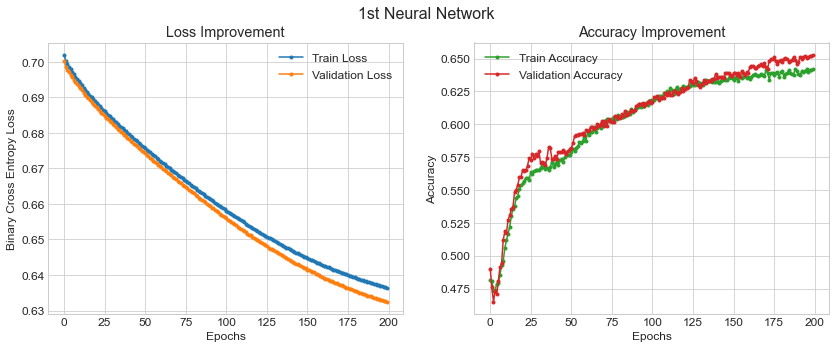

In [33]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_style('whitegrid')
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14, 5))
fig.suptitle("1st Neural Network", fontsize=16)

axs[0].plot(run_hist_1.history["loss"], marker='.', color=colors[0], label="Train Loss")
axs[0].plot(run_hist_1.history["val_loss"], marker='.', color=colors[1], label="Validation Loss")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Binary Cross Entropy Loss")
axs[0].set_title("Loss Improvement")
axs[0].legend()

axs[1].plot(run_hist_1.history["accuracy"], marker='.', color=colors[2], label="Train Accuracy")
axs[1].plot(run_hist_1.history["val_accuracy"], marker='.', color=colors[3], label="Validation Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Accuracy Improvement")
axs[1].legend();

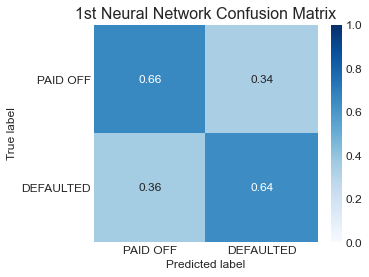

In [34]:
sns.set_style('white')
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred,normalize='true'),index=['PAID OFF', 'DEFAULTED'], columns=['PAID OFF', 'DEFAULTED'])
plt.figure(figsize=(5,4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', vmin=0.0, vmax=1.0)
plt.xlabel('Predicted label')
plt.yticks(rotation=0)
plt.ylabel('True label')
plt.title('1st Neural Network Confusion Matrix', fontsize=16);

## 7. Neural Network Hyperparameter Optimization

How to use GridSeachCV on Hyperparameter for Keras NN models: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/ 

In [35]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='Adam', neurons=15, layers=0):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=30, activation='sigmoid', name="hidden_1"))
    # add hidden layer
    if layers > 1:
        for l in range(1,layers):
            model.add(Dense(neurons, activation='sigmoid', name="hidden_"+str(l+1)))
    # final outlayer
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [37]:
model = KerasClassifier(build_fn=create_model, verbose=2) # maybe verbose=2 so I see where it's at?

# define the grid search parameters
batch_size = [30, 60, 120]
epochs = [50, 100, 200]
neurons = [15, 30]
optimizer = ['SGD', 'RMSprop', 'Adam']
layers = [1, 2, 3, 4]

param_grid = dict(batch_size=batch_size, epochs=epochs, neurons=neurons, optimizer=optimizer, layers=layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1)
grid_result = grid.fit(X_train_norm, y_train)

y_pred = grid.predict(X_test_norm)

print(grid.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 68.8min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 70.8min finished


Epoch 1/200
332/332 - 1s - loss: 0.6924 - accuracy: 0.5165
Epoch 2/200
332/332 - 0s - loss: 0.6753 - accuracy: 0.6078
Epoch 3/200
332/332 - 0s - loss: 0.6368 - accuracy: 0.6457
Epoch 4/200
332/332 - 0s - loss: 0.6220 - accuracy: 0.6529
Epoch 5/200
332/332 - 0s - loss: 0.6162 - accuracy: 0.6606
Epoch 6/200
332/332 - 0s - loss: 0.6137 - accuracy: 0.6610
Epoch 7/200
332/332 - 0s - loss: 0.6105 - accuracy: 0.6678
Epoch 8/200
332/332 - 0s - loss: 0.6082 - accuracy: 0.6687
Epoch 9/200
332/332 - 0s - loss: 0.6069 - accuracy: 0.6696
Epoch 10/200
332/332 - 0s - loss: 0.6053 - accuracy: 0.6732
Epoch 11/200
332/332 - 0s - loss: 0.6041 - accuracy: 0.6739
Epoch 12/200
332/332 - 0s - loss: 0.6036 - accuracy: 0.6764
Epoch 13/200
332/332 - 0s - loss: 0.6021 - accuracy: 0.6778
Epoch 14/200
332/332 - 0s - loss: 0.6015 - accuracy: 0.6789
Epoch 15/200
332/332 - 0s - loss: 0.6001 - accuracy: 0.6747
Epoch 16/200
332/332 - 0s - loss: 0.5993 - accuracy: 0.6815
Epoch 17/200
332/332 - 0s - loss: 0.5983 - accura

In [38]:
grid_result

GridSearchCV(cv=5,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000016D62CC0BE0>,
             n_jobs=-1,
             param_grid={'batch_size': [30, 60, 120], 'epochs': [50, 100, 200],
                         'layers': [1, 2, 3], 'neurons': [15, 30],
                         'optimizer': ['SGD', 'RMSprop', 'Adam']},
             verbose=1)

In [39]:
print("2nd Neural Network Classification Report:")
print(classification_report(y_test, y_pred))

2nd Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1668
           1       0.71      0.69      0.70      1645

    accuracy                           0.70      3313
   macro avg       0.70      0.70      0.70      3313
weighted avg       0.70      0.70      0.70      3313



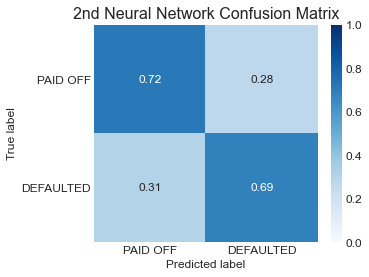

In [42]:
sns.set_style('white')
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred,normalize='true'),index=['PAID OFF', 'DEFAULTED'], columns=['PAID OFF', 'DEFAULTED'])
plt.figure(figsize=(5,4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', vmin=0.0, vmax=1.0)
plt.xlabel('Predicted label')
plt.yticks(rotation=0)
plt.ylabel('True label')
plt.title('2nd Neural Network Confusion Matrix', fontsize=16);

{'batch_size': 30, 'epochs': 200, 'layers': 3, 'neurons': 30, 'optimizer': 'Adam'}

In [41]:
model_2 = Sequential()
model_2.add(Dense(30, input_shape = (X_train_norm.shape[1], ), activation = 'sigmoid'))
model_2.add(Dense(30, activation = 'sigmoid'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_11 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 31        
Total params: 1,891
Trainable params: 1,891
Non-trainable params: 0
_________________________________________________________________


In [42]:
model_2.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200, batch_size=30, verbose=0)

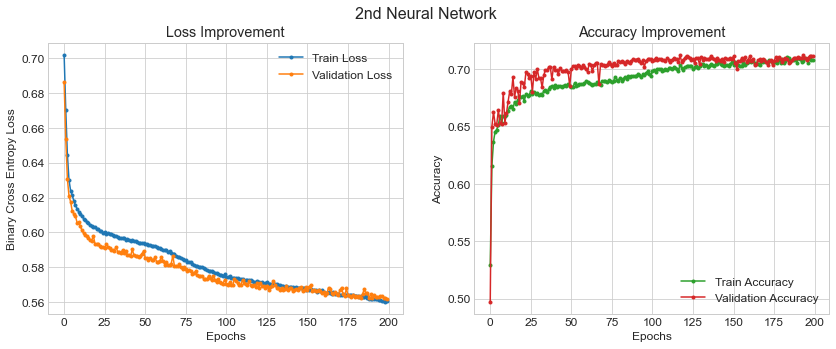

In [43]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_style('whitegrid')
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14, 5))
fig.suptitle("2nd Neural Network", fontsize=16)

axs[0].plot(run_hist_2.history["loss"], marker='.', color=colors[0], label="Train Loss")
axs[0].plot(run_hist_2.history["val_loss"], marker='.', color=colors[1], label="Validation Loss")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Binary Cross Entropy Loss")
axs[0].set_title("Loss Improvement")
axs[0].legend()

axs[1].plot(run_hist_2.history["accuracy"], marker='.', color=colors[2], label="Train Accuracy")
axs[1].plot(run_hist_2.history["val_accuracy"], marker='.', color=colors[3], label="Validation Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Accuracy Improvement")
axs[1].legend();

In [44]:
y_pred = model_2.predict_classes(X_test_norm)
best_2NN_metrics = [accuracy_score(y_test,y_pred), precision_score(y_test,y_pred), recall_score(y_test,y_pred), f1_score(y_test,y_pred)]
best_2NN_metrics

[0.7111379414428011,
 0.7521994134897361,
 0.6237082066869301,
 0.6819541375872382]